# DL Lab 1.4 - Neural Network in Numpy

In this notebook, we will implement a simple neural network using numpy in two different flavors.
We will train and evaluate the network on synthetic data of three different kinds.

***

**After completing this notebook, you will have implemented**:
* and trained Neural Networks using numpy,
* Neural Networks in objectified form,
* different initialization methods,
* different activation functions,
* Neural Networks with multiple hidden layers.

***

**Instructions**

- Either run the notebook locally or on [Google Colab](https://colab.research.google.com/).
- The notebook provides just the basic structure. Check the associated homework description in Moodle for more information on what to do.
- Lines encapsulated in "<font color='green'>`### START CODE HERE ###`</font>" and "<font color='green'>`### END CODE HERE ###`</font>", or marked by "<font color='green'>`# TODO`</font>", denote the code fragments to be completed by you.
- There's no need to write any other code. Do not modify the code outside of the designated areas
- If you get stuck, check your Lecture and Lab notes and use the discussion forum in Moodle.

Let's get started!

***

In [1]:
import sys
import typing

import numpy as np

import extras

## Preparation

Execute the following cell to download to some helper functions.
After importing, the following functions will be available in the `utils` module:
- `generate_dataset()`: generates synthetic data for binary classification with different distributions
- `split_dataset()`: splits a given dataset into training, validation and test sets
- `plot_activation_function()`: plots the activation function and its derivative
- `plot_decision_boundary()`: plots the decision boundary of a given model
- `plot_history()`: plots the history (loss + metric) of a given model
"""

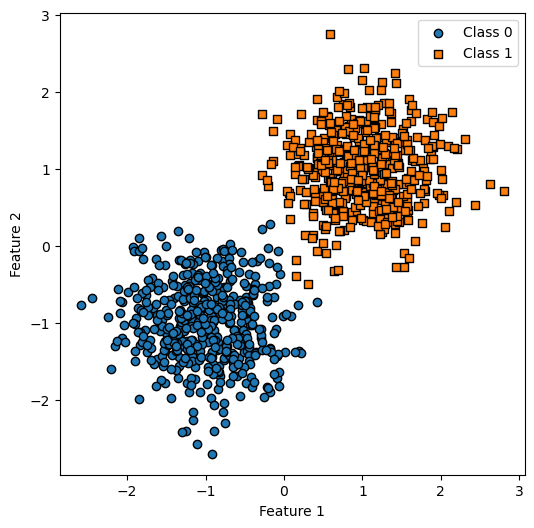

In [2]:
# Load input features X and target labels Y
X, Y = extras.generate_dataset(1024, 'centroids')

Another method in `utils` is `split_dataset`, which splits the dataset into training, validation, and test sets.
Run the next cell to split the data.

In [3]:
# Split the dataset into training, validation, and testing sets
X_train, Y_train, X_val, Y_val, X_test, Y_test = extras.split_dataset(X, Y)

## Task 1.4.1: A simple Neural Network

Your first task is to implement several methods needed to train a two layer neural network for binary classification in a scripted way.

In [4]:
def init_parameters(input_size, hidden_size, output_size):
	"""
    Initializes the weights and biases of a neural network with two layers.

    Arguments:
    ----------
    input_size (int): The number of input features.
    hidden_size (int): The number of neurons in the hidden layer.
    output_size (int): The number of output neurons.

    Returns:
    --------
    dict: A dictionary containing the weights and biases of the network:
        {W1, b1, W2, b2}
    """

	W1 = np.random.randn(hidden_size, input_size) * 0.01
	b1 = np.zeros((hidden_size, 1))
	W2 = np.random.randn(output_size, hidden_size) * 0.01
	b2 = np.zeros((output_size, 1))

	return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

Check the dimensions of the input and output of the network, initialize the weights and biases accordingly and print their shapes.

In [5]:
### START CODE HERE ###

# Initialize the parameters of the neural network
parameters = init_parameters(2, 8, 1)

# Print the shapes of the initialized parameters
print("W1.shape: ", parameters["W1"].shape)
print("b1.shape: ", parameters["b1"].shape)
print("W2.shape: ", parameters["W2"].shape)
print("b2.shape: ", parameters["b2"].shape)

### END CODE HERE ###

assert parameters["W2"].shape == (1, 8), "Incorrect shape for W2"

W1.shape:  (8, 2)
b1.shape:  (8, 1)
W2.shape:  (1, 8)
b2.shape:  (1, 1)


We will use the Sigmoid activation function for the hidden and the output layer. Complete the `sigmoid` and `sigmoid_derivative` methods and plot them using the `utils.plot_activation_function` method.

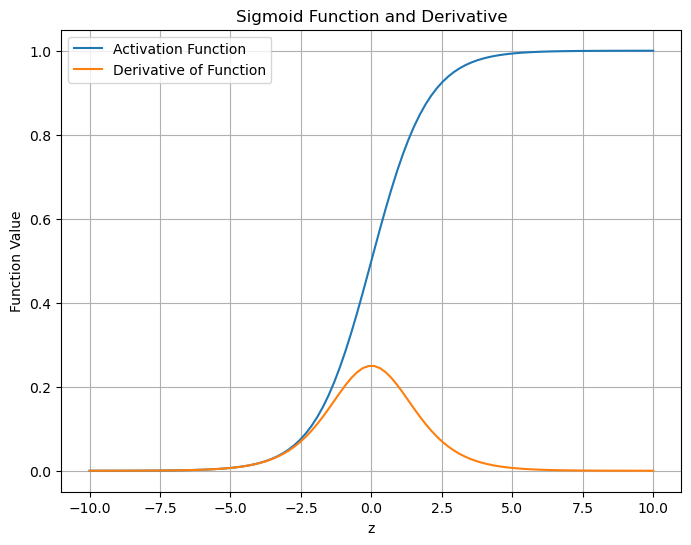

In [6]:
def sigmoid(Z):
	"""
    Computes the sigmoid activation function element-wise.

    Arguments:
    ----------
    Z (numpy.ndarray): The input to the activation function.

    Returns:
    --------
    numpy.ndarray: The output of the sigmoid function.
    """
	### START CODE HERE ###
	return 1 / (1 + np.exp(-Z))


### END CODE HERE ###


def sigmoid_derivative(A):
	"""
    Computes the derivative of the sigmoid activation function element-wise.

    Arguments:
    ----------
    A (numpy.ndarray): The output of the sigmoid function.

    Returns:
    --------
    numpy.ndarray: The derivative of the sigmoid function.
    """
	### START CODE HERE ###
	return A * (1 - A)


### END CODE HERE ###


extras.plot_activation_function(sigmoid, sigmoid_derivative, "Sigmoid Function and Derivative")

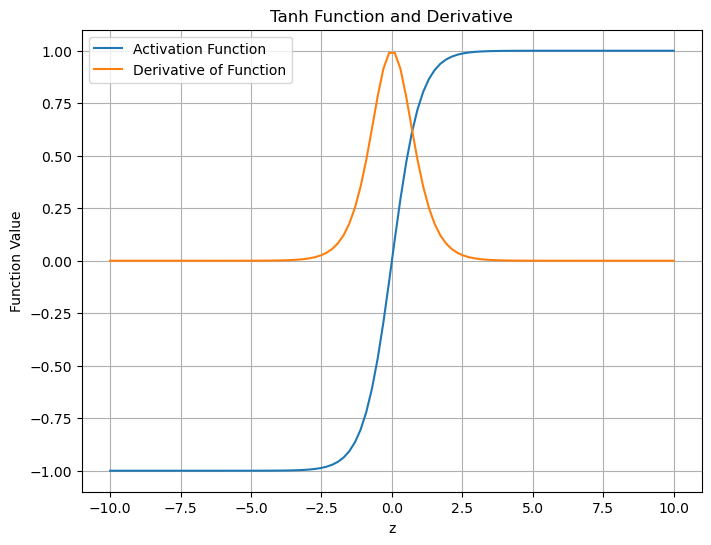

In [7]:
def tanh(Z):
	"""
    Computes the tanh activation function element-wise.

    Arguments:
    ----------
    Z (numpy.ndarray): The input to the activation function.

    Returns:
    --------
    numpy.ndarray: The output of the tanh function.
    """
	### START CODE HERE ###
	return np.tanh(Z)


### END CODE HERE ###


def tanh_derivative(A):
	"""
    Computes the derivative of the tanh activation function element-wise.

    Arguments:
    ----------
    A (numpy.ndarray): The output of the tanh function.

    Returns:
    --------
    numpy.ndarray: The derivative of the tanh function.
    """
	### START CODE HERE ###
	return 1.0 - (A ** 2)


### END CODE HERE ###


extras.plot_activation_function(tanh, tanh_derivative, "Tanh Function and Derivative")

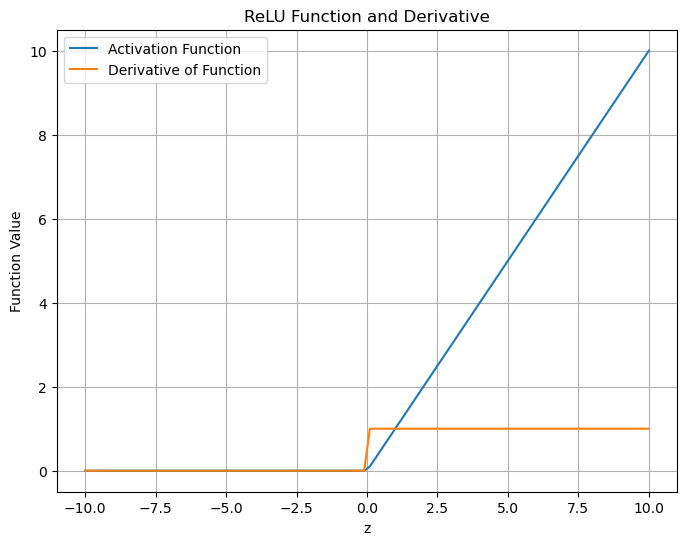

In [8]:
def relu(Z):
	"""
    Computes the relu activation function element-wise.

    Arguments:
    ----------
    Z (numpy.ndarray): The input to the activation function.

    Returns:
    --------
    numpy.ndarray: The output of the relu function.
    """
	### START CODE HERE ###
	return np.maximum(0, Z)


### END CODE HERE ###


def relu_derivative(A):
	"""
    Computes the derivative of the relu activation function element-wise.

    Arguments:
    ----------
    A (numpy.ndarray): The output of the relu function.

    Returns:
    --------
    numpy.ndarray: The derivative of the relu function.
    """
	### START CODE HERE ###
	return (A > 0).astype(float)


### END CODE HERE ###


extras.plot_activation_function(relu, relu_derivative, "ReLU Function and Derivative")

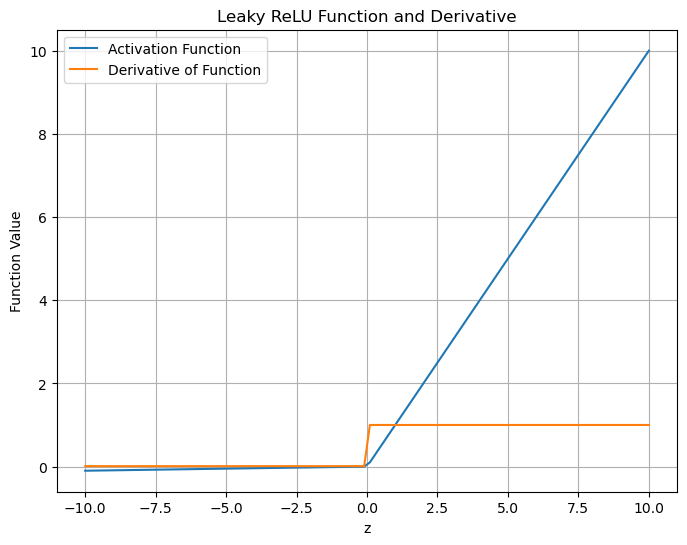

In [9]:
def leaky_relu(Z, alpha=0.01):
	"""
    Computes the Leaky ReLU activation function element-wise.

    f(Z) = max(Z, alpha * Z).

    Arguments:
    ----------
    Z (numpy.ndarray): The input to the activation function.
    alpha (float): The slope for the negative region (default is 0.01).

    Returns:
    --------
    numpy.ndarray: The output of the Leaky ReLU function (A).
    """
	### START CODE HERE ###
	return np.where(Z > 0, Z, alpha * Z)


### END CODE HERE ###


def leaky_relu_derivative(A, alpha=0.01):
	"""
    Computes the derivative of the Leaky ReLU activation function element-wise.

    Arguments:
    ----------
    A (numpy.ndarray): The output of the Leaky ReLU function (A = f(Z)).
    alpha (float): The slope for the negative region (default is 0.01).

    Returns:
    --------
    numpy.ndarray: The derivative of the Leaky ReLU function (dZ/dA).
    """
	### START CODE HERE ###
	# Initialize the derivative array with 1s (for the positive inputs)
	dZ = np.ones_like(A, dtype=float)

	# Set the derivative at those indices to alpha
	dZ[A <= 0] = alpha

	return dZ


### END CODE HERE ###


extras.plot_activation_function(leaky_relu, leaky_relu_derivative, "Leaky ReLU Function and Derivative")

Implement the forward pass of the network in the `forward` function. You can use the `np.dot` method for matrix multiplication.

In [10]:
def forward(X, parameters):
	"""
    Implements the forward propagation for a two-layer neural network.

    Arguments:
    ----------
    X -- input data of shape (input size, number of examples)
    parameters -- python dictionary containing the parameters "W1", "b1", "W2", "b2":
                  W1 -- weight matrix of shape (hidden layer size, input size)
                  b1 -- bias vector of shape (hidden layer size, 1)
                  W2 -- weight matrix of shape (output layer size, hidden layer size)
                  b2 -- bias vector of shape (output layer size, 1)
    Returns:
    --------
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2":
             Z1 -- pre-activation parameter of the hidden layer
             A1 -- activation of the hidden layer
             Z2 -- pre-activation parameter of the output layer
             A2 -- activation of the output layer
    """

	### START CODE HERE ###
	W1 = parameters["W1"]
	b1 = parameters["b1"]
	W2 = parameters["W2"]
	b2 = parameters["b2"]

	Z1 = W1 @ X + b1
	A1 = sigmoid(Z1)

	Z2 = W2 @ A1 + b2
	A2 = sigmoid(Z2)
	### END CODE HERE ###

	# return output A2 along with intermediate computations as dictionary
	return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

In [11]:
# Test the forward function
_test = forward(X_train.T, parameters)
assert _test["A2"].shape == (1, X_train.shape[0]), "The shape of A2 is incorrect."

We will use the binary cross-entropy loss as implemented in the `compute_binary_CE_loss` function:

In [12]:
def compute_binary_CE_loss(Y_hat, Y):
	"""
    Computes the binary cross-entropy loss between predicted and true labels.

    Arguments:
    ----------
    Y_hat (numpy.ndarray): The predicted probabilities.
    Y (numpy.ndarray): The true class labels.

    Returns:
    --------
    float: The binary cross-entropy loss.
    """
	Y_hat += 1e-9  # Avoid division by zero
	return np.mean(- Y * np.log(Y_hat) - (1 - Y) * np.log(1 - Y_hat))

The backward pass is implemented in the `backward` method:

In [13]:
def backward(parameters, cache, X, Y):
	"""
    Implements the backward propagation for a two-layer neural network.

    Arguments:
    ----------
    parameters -- python dictionary containing the parameters "W1", "b1", "W2", "b2"
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2"
    X -- input data of shape (input size, number of examples)
    Y -- true "label" vector of shape (output size, number of examples)

    Returns:
    --------
    gradients -- python dictionary containing the gradients with respect to different parameters
    """

	num_samples = X.shape[1]

	# second layer
	dZ2 = (cache["A2"] - Y) / num_samples
	dW2 = np.dot(dZ2, cache["A1"].T)
	db2 = np.sum(dZ2, axis=1, keepdims=True)

	# first layer
	dZ1 = np.dot(parameters["W2"].T, dZ2) * sigmoid_derivative(cache["A1"])
	dW1 = np.dot(dZ1, X.T)
	db1 = np.sum(dZ1, axis=1, keepdims=True)

	# return gradients
	return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

Finally, implement the `update_parameters` method to update the weights and biases of the network using the gradients:

In [14]:
def update_parameters(parameters, gradients, learning_rate):
	"""
    Update the parameters of a neural network using gradient descent.

    Arguments:
    ----------
        parameters (dict): Dictionary containing the parameters of the neural network.
            - "W1": Weights of the first layer.
            - "b1": Biases of the first layer.
            - "W2": Weights of the second layer.
            - "b2": Biases of the second layer.
        gradients (dict): Dictionary containing the gradients of the parameters.
            - "dW1": Gradient of the weights of the first layer.
            - "db1": Gradient of the biases of the first layer.
            - "dW2": Gradient of the weights of the second layer.
            - "db2": Gradient of the biases of the second layer.
        learning_rate (float): The learning rate for gradient descent.

    Returns:
    --------
        dict: Updated parameters dictionary.
    """
	### START CODE HERE ###
	parameters["W1"] -= learning_rate * gradients["dW1"]
	parameters["b1"] -= learning_rate * gradients["db1"]
	parameters["W2"] -= learning_rate * gradients["dW2"]
	parameters["b2"] -= learning_rate * gradients["db2"]
	### END CODE HERE ###

	return parameters

The next cell implements one step of Gradient Descend.

In [15]:
def optimize_step(X, Y, X_val, Y_val, parameters, learning_rate, verbose=True):
	"""
    Perform one optimization step including forward propagation, loss computation,
    backward propagation, and parameter updates. Also computes and prints metrics
    for training and validation sets.

    Arguments:
    ----------
        X (numpy.ndarray): Input data for training.
        Y (numpy.ndarray): True labels for training data.
        X_val (numpy.ndarray): Input data for validation.
        Y_val (numpy.ndarray): True labels for validation data.
        parameters (dict): Dictionary containing the model parameters.
        learning_rate (float): Learning rate for the parameter update step.
        verbose (bool, optional): If True, prints the loss and accuracy metrics. Defaults to True.

    Returns:
    --------
        tuple: Updated parameters and a dictionary containing the metrics
               (loss, val_loss, accuracy, val_accuracy).
    """

	metrics = {
		"loss": 0.0,
		"val_loss": 0,
		"accuracy": 0,
		"val_accuracy": 0
	}

	cache = forward(X, parameters)
	metrics["loss"] = compute_binary_CE_loss(cache["A2"], Y)
	gradients = backward(parameters, cache, X, Y)
	parameters = update_parameters(parameters, gradients, learning_rate)
	metrics["accuracy"] = np.mean(np.round(cache["A2"]) == Y)

	# val
	cache_val = forward(X_val, parameters)
	metrics["val_loss"] = compute_binary_CE_loss(cache_val["A2"], Y_val)
	metrics["val_accuracy"] = np.mean(np.round(cache_val["A2"]) == Y_val)
	if verbose:
		print(f"loss: {metrics['loss']:.3f}; validation_loss: {metrics['val_loss']:.3f}")
		print(f"accuracy: {metrics['accuracy']:.3f}; val_accuracy: {metrics['val_accuracy']:.3f}")

	return parameters, metrics

Initialize the parameters and train the network for 100 epochs with a learning rate of 1.

Epoch: 0 - loss: 0.693; validation_loss: 0.694; accuracy: 0.493; val_accuracy: 0.441
Epoch: 1 - loss: 0.693; validation_loss: 0.694; accuracy: 0.507; val_accuracy: 0.441
Epoch: 2 - loss: 0.693; validation_loss: 0.695; accuracy: 0.507; val_accuracy: 0.441
Epoch: 3 - loss: 0.693; validation_loss: 0.695; accuracy: 0.507; val_accuracy: 0.441
Epoch: 4 - loss: 0.693; validation_loss: 0.695; accuracy: 0.507; val_accuracy: 0.441
Epoch: 5 - loss: 0.693; validation_loss: 0.694; accuracy: 0.507; val_accuracy: 0.441
Epoch: 6 - loss: 0.693; validation_loss: 0.694; accuracy: 0.507; val_accuracy: 0.441
Epoch: 7 - loss: 0.693; validation_loss: 0.694; accuracy: 0.507; val_accuracy: 0.441
Epoch: 8 - loss: 0.693; validation_loss: 0.694; accuracy: 0.507; val_accuracy: 0.441
Epoch: 9 - loss: 0.692; validation_loss: 0.694; accuracy: 0.507; val_accuracy: 0.441
Epoch: 10 - loss: 0.692; validation_loss: 0.694; accuracy: 0.507; val_accuracy: 0.441
Epoch: 11 - loss: 0.692; validation_loss: 0.693; accuracy: 0.507

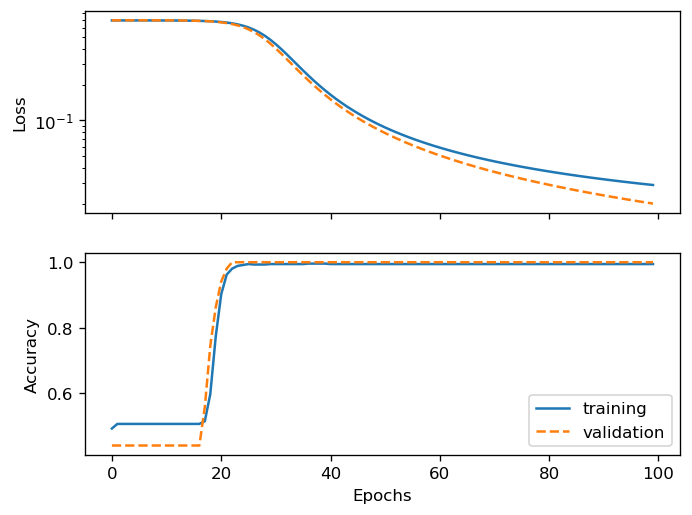

In [16]:
learning_rate = 1

# Initialize the parameters of the neural network
### START CODE HERE ###
parameters = init_parameters(2, 8, 1)
### END CODE HERE ###

history = {
	"loss": [],
	"val_loss": [],
	"accuracy": [],
	"val_accuracy": []
}

for epoch in range(100):
	parameters, metrics = optimize_step(
		X_train.T,
		Y_train,
		X_val.T,
		Y_val,
		parameters,
		learning_rate,
		verbose=False
	)
	print(f"Epoch: {epoch} - loss: {metrics['loss']:.3f}; validation_loss: {metrics['val_loss']:.3f}",
		  f"; accuracy: {metrics['accuracy']:.3f}; val_accuracy: {metrics['val_accuracy']:.3f}",
		  sep='')

	history["loss"].append(metrics["loss"])
	history["val_loss"].append(metrics["val_loss"])

	history["accuracy"].append(metrics["accuracy"])
	history["val_accuracy"].append(metrics["val_accuracy"])

extras.plot_history(history)

## Task 1.4.2 - Objectified Layers

### Layers

In [47]:
class Dense(extras.Layer):
	"""Dense layer with weight matrix `W` and bias vector `b`.

    Attributes:
    ---
      output_size (int): number of neurons
      input_size (int): size of the input data
      W (numpy.ndarray): layer weights of shape (output_size, input_size)
      b (numpy.ndarray): layer bias of shape (output_size, 1)
      input (numpy.ndarray): layer input
      output (numpy.ndarray): layer output
      dW (numpy.ndarray): derivative w.r.t. weights `W`
      db (numpy.ndarray): derivative w.r.t. bias `b`
      gradient_out (numpy.ndarray): derivative w.r.t. layer input `input`

    Methods:
    ---
      forward( input )
      backward( gradient_in )
      update( learning_rate )
    """

	_name = 'Dense'

	def __init__(self, input_size, output_size, method: typing.Literal['simplescaled', 'constant', 'xavier', 'he'] = 'simplescaled'):
		"""Init a dense layer

        Initialize a dense layer with number of neurons = `output_size` for an input
        of size `input_size`. Weights `W` are randomly initialized from normal
        distribution. Bias `b` is initialized as zeros.

        Args:
            input_size (int): number of input elements
            output_size (int): number of neurons in layer
        """
		self.input_size = input_size
		self.output_size = output_size
		self.method = method.lower()

		# initialize weights
		self.W = np.random.randn(self.output_size, self.input_size)

		if self.method == 'simplescaled':
			self.W = self.W * 0.01
		elif self.method == 'constant':
			self.W = self.W * 0 + 1.
		elif self.method == 'xavier':
			### START CODE HERE ###
			self.W *= np.sqrt(2.0 / (self.input_size + self.output_size))
		elif self.method == 'he':
			self.W *= np.sqrt(2.0 / self.input_size)
		### END CODE HERE ###
		else:
			raise ValueError('Invalid initialization method')

		# initialize bias
		self.b = np.zeros((self.output_size, 1))

	def forward(self, input):
		"""Forward pass of `input` through dense layer. Output is stored in `output`.

        Args:
          input (numpy.ndarray): layer input
        """

		# store layer input
		self.input = input

		# compute layer output
		### START CODE HERE ###
		self.output = self.W @ self.input + self.b
		### END CODE HERE ###

		return self.output

	def backward(self, gradient_in):
		"""Backward pass of `gradient_in` through dense layer.
        Computes derivatives (gradients) w.r.t. weights, bias, and layer input.
        Gradients are stored in `dW`, `db`, `gradient_out`.

        Args:
          gradient_in (numpy.ndarray): derivative w.r.t. layer output
        """
		m = self.input.shape[1]

		# derivative w.r.t. `W`
		### START CODE HERE ###
		self.dW = np.dot(gradient_in, self.input.T) / m

		# derivative w.r.t. `b`
		self.db = np.sum(gradient_in, axis=1, keepdims=True) / m
		### END CODE HERE ###

		# derivative w.r.t. layer input
		self.gradient_out = np.dot(self.W.T, gradient_in)

		return self.gradient_out

	def update(self, learning_rate):
		"""Update layer parameters `W`, `b` using function argument `learning_rate`

        Args:
          learning_rate (float): value of the learning rate
        """
		### START CODE HERE ###
		self.W -= learning_rate * self.dW
		self.b -= learning_rate * self.db

### END CODE HERE ###

### Activation Functions

In [48]:
class Sigmoid(extras.Layer):
	""" Activation layer using the logistic function (aka sigmoid function)

    Attributes:
    ---
      output (numpy.ndarray): layer output
      gradient_out (numpy.ndarray): derivative w.r.t. layer input `Z`

    Methods:
    ---
      forward( input )
      backward( gradient_in )
    """

	def forward(self, input):
		"""Forward pass of `input` through sigmoid layer.

        Compute the value of the sigmoid function for each element of `input`.
        The output is stored in `output`.

        Args:
          input (numpy.ndarray): layer input

        Returns:
          numpy.ndarray: layer output
        """
		### START CODE HERE ###
		self.output = sigmoid(input)
		### END CODE HERE ###
		return self.output

	def backward(self, gradient_in):
		"""Backward pass of `gradient_in` through sigmoid layer.
        The output is stored in `gradient_out`.

        Args:
          gradient_in (numpy.ndarray): gradient w.r.t. layer output

        Returns:
          numpy.ndarray: gradient w.r.t. layer input
        """
		### START CODE HERE ###
		self.gradient_out = gradient_in * sigmoid_derivative(self.output)
		### END CODE HERE ###
		return self.gradient_out

In [49]:
class Tanh(extras.Layer):
	""" Activation layer using the tanh function

    Attributes:
    ---
      output (numpy.ndarray): layer output
      gradient_out (numpy.ndarray): derivative w.r.t. layer input `Z`

    Methods:
    ---
      forward( input )
      backward( gradient_in )
    """

	def forward(self, input):
		"""Forward pass of `input` through tanh layer.

        Compute the value of the tanh function for each element of `input`.
        The output is stored in `output`.

        Args:
          input (numpy.ndarray): layer input

        Returns:
          numpy.ndarray: layer output
        """
		### START CODE HERE ###
		self.output = tanh(input)
		### END CODE HERE ###
		return self.output

	def backward(self, gradient_in):
		"""Backward pass of `gradient_in` through tanh layer.
        The output is stored in `gradient_out`.

        Args:
          gradient_in (numpy.ndarray): gradient w.r.t. layer output

        Returns:
          numpy.ndarray: gradient w.r.t. layer input
        """
		### START CODE HERE ###
		self.gradient_out = gradient_in * tanh_derivative(self.output)
		### END CODE HERE ###
		return self.gradient_out

In [50]:
class ReLU(extras.Layer):
	""" Activation layer using the Rectified Linear Unit (ReLU) function.

    Attributes:
    ---
      output (numpy.ndarray): layer output (A)
      gradient_out (numpy.ndarray): derivative w.r.t. layer input Z
      # Mask stores which elements were positive during the forward pass
      mask (numpy.ndarray): boolean array to identify positive inputs

    Methods:
    ---
      forward( input )
      backward( gradient_in )
    """

	def forward(self, input):
		"""Forward pass of 'input' through ReLU layer.

         Computes the value of the ReLU function: f(Z) = max(0, Z).
         The output is stored in 'output', and a 'mask' of positive inputs is saved.

         Args:
           input (numpy.ndarray): layer input (Z)

         Returns:
           numpy.ndarray: layer output (A)
         """
		### START CODE HERE ###
		self.output = relu(input)
		### END CODE HERE ###
		return self.output

	def backward(self, gradient_in):
		"""Backward pass of 'gradient_in' through ReLU layer.
         The output is stored in 'gradient_out'.

         The derivative is 1 for Z > 0 and 0 for Z <= 0.
         We simply multiply the incoming gradient by the mask.

         Args:
           gradient_in (numpy.ndarray): gradient w.r.t. layer output (dA)

         Returns:
           numpy.ndarray: gradient w.r.t. layer input (dZ)
         """
		### START CODE HERE ###
		self.gradient_out = gradient_in * relu_derivative(self.output)
		### END CODE HERE ###
		return self.gradient_out

In [51]:
class LeakyReLU(extras.Layer):
	""" Activation layer using the Leaky Rectified Linear Unit (Leaky ReLU) function.

    Attributes:
    ---
      output (numpy.ndarray): layer output (A)
      gradient_out (numpy.ndarray): derivative w.r.t. layer input Z
      alpha (float): slope for negative inputs (e.g., 0.01)

    Methods:
    ---
      forward( input )
      backward( gradient_in )
    """

	def __init__(self, alpha=0.01):
		# Initialize the slope for the negative region
		self.alpha = alpha

	def forward(self, input):
		"""Forward pass of 'input' through Leaky ReLU layer.

         Args:
           input (numpy.ndarray): layer input (Z)

         Returns:
           numpy.ndarray: layer output (A)
         """
		### START CODE HERE ###
		self.output = leaky_relu(input, self.alpha)
		### END CODE HERE ###
		return self.output

	def backward(self, gradient_in):
		"""Backward pass of 'gradient_in' through Leaky ReLU layer.

         The derivative is 1 for Z > 0 and 'alpha' for Z <= 0.

         Args:
           gradient_in (numpy.ndarray): gradient w.r.t. layer output (dA)

         Returns:
           numpy.ndarray: gradient w.r.t. layer input (dZ)
         """
		### START CODE HERE ###
		self.gradient_out = gradient_in * leaky_relu_derivative(self.output, self.alpha)
		### END CODE HERE ###
		return self.gradient_out

### Loss & Metrics

In [52]:
# def BinaryCrossEntropy(Y, Y_hat):
# 	"""
#     Compute the binary cross-entropy loss and its derivative.
#
#     Args:
#     - Y (numpy.ndarray): Ground truth labels of shape (batch_size, 1).
#     - Y_hat (numpy.ndarray): Predicted probabilities of shape (batch_size, 1).
#
#     Returns:
#     - loss (float): Binary cross-entropy loss.
#     - dY_hat (numpy.ndarray): Derivative of the loss with respect to Y_hat.
#         Normalized by the batch size (number of samples).
#     """
# 	Y_hat += 1e-9  # Avoid division by zero
#
# 	### START CODE HERE ###
# 	loss = np.mean(- Y * np.log(Y_hat) - (1 - Y) * np.log(1 - Y_hat))
# 	### END CODE HERE ###
#
# 	dY_hat = 1 / Y_hat.shape[1] * (Y_hat - Y) / (Y_hat * (1 - Y_hat))
#
# 	return np.squeeze(loss), dY_hat

def BinaryCrossEntropy(Y, Y_hat, eps=1e-9):
	"""
    Compute binary cross-entropy loss and gradient dL/dY_hat.

    Accepts Y and Y_hat as shape (1, m) or (m,) or (k, m). Returns (loss_scalar, dY_hat_same_shape).

    dL/dY_hat = -(Y / Y_hat - (1 - Y) / (1 - Y_hat)) / m
    """
	# convert to numpy arrays
	Y = np.asarray(Y)
	Y_hat = np.asarray(Y_hat)

	# unify shapes to (1, m) or (k, m)
	if Y.ndim == 1:
		Y = Y.reshape(1, -1)
	if Y_hat.ndim == 1:
		Y_hat = Y_hat.reshape(1, -1)

	# clip predictions for numerical stability
	Y_hat = np.clip(Y_hat, eps, 1.0 - eps)

	m = Y.shape[1]  # number of samples

	# loss averaged over samples
	loss = -np.sum(Y * np.log(Y_hat) + (1.0 - Y) * np.log(1.0 - Y_hat)) / m

	# gradient shape matches Y_hat
	dY_hat = -(Y / Y_hat - (1.0 - Y) / (1.0 - Y_hat)) / m

	return float(loss), dY_hat


def BinaryAccuracy(Y, Y_hat):
	"""Returns binary accuracy computed as average of correct predictions.

    Args:
        Y (numpy.ndarray): expected output of shape `(num_samples,)`
        Y_hat (numpy.ndarray): predicted output of shape `(1, num_samples,)`

    Returns:
        float: binary accuracy
    """

	Y_hat = np.where(Y_hat > 0.5, 1, 0)

	return np.mean(Y == Y_hat)

### Neural Network

In [53]:
class NeuralNet:
	"""A feed-forward neural network.

    Attributes:
    ---
        layers (list): list of layers
        number_of_parameters (int): number of trainable model parameters

    Methods:
    ---
        compile()
        fit()
        forward()
        backward()
        update()
    """

	def __init__(self, layers):
		"""Initialize Neural Network defined by stack of `layers`.

        Args:
        layers (list): stack of layers
        """

		self.layers = layers
		self.history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
		print('Initialized Neural Network with {} parameters:\n'.format(self.number_of_parameters))
		print('{0: >10}: {1}'.format('{layer}', '{# parameters}'))
		for layer in self.layers:
			print('{0: >10}: {1}'.format(
				layer.__class__.__name__,
				layer.number_of_parameters
			))

	def compile(self, loss_function=None, optimizer=None, metric=None):

		"""
        Compiles the model with the specified loss function, optimizer, and metric.

        Args:
            loss_function: The loss function to be used for training the model.
            optimizer: The optimizer algorithm to be used for updating the model's parameters.
            metric: The metric used to evaluate the performance of the model.

        Returns:
            None
        """

		self.loss_function = loss_function
		self.optimizer = optimizer
		self.optimizer.model = self
		self.metric = metric

		# try forward random sample
		try:
			X_random = np.random.randn(self.layers[0].input_size, 1)
			Y_hat = self.forward(X_random)
			Y_random = np.round(np.random.rand(Y_hat.shape[0], 1))
		except Exception as exc:
			print('Error during forward pass of random sample:\n', exc)
			sys.exit(1)

		# try backward loss
		try:
			_, dY_hat = self.loss_function(Y_random, Y_hat)
			self.backward(dY_hat)
		except Exception as exc:
			print('Error during backward pass of random sample:\n', exc)
			sys.exit(1)

		# try compute metric
		try:
			self.metric(Y_random, Y_hat)
		except Exception as exc:
			print('Error during computation of metric:\n', exc)
			sys.exit(1)

		print('Model compiled successfully.')

	def fit(self, train_samples, train_labels, val_samples, val_labels, epochs, verbose=True):
		"""
        Trains the model on the given training samples and labels for the specified number of epochs.
        Calculates the loss and accuracy for each epoch on both the training and validation data.

        Args:
            train_samples (array-like): The training samples.
            train_labels (array-like): The training labels.
            val_samples (array-like): The validation samples.
            val_labels (array-like): The validation labels.
            epochs (int): The number of epochs to train the model.

        Returns:
            dict: A dictionary containing the training history, including the loss and accuracy for each epoch.
        """
		for epoch in range(epochs):

			# train step
			loss, predictions = self.optimizer.step(
				train_samples,
				train_labels,
				epoch,
			)
			acc = self.metric(train_labels, predictions)
			self.history["loss"].append(loss)
			self.history["accuracy"].append(acc)

			# validation
			val_labels_pred = self.forward(val_samples)
			val_loss, _ = self.loss_function(val_labels, val_labels_pred)
			val_acc = self.metric(val_labels, val_labels_pred)
			self.history["val_loss"].append(val_loss)
			self.history["val_accuracy"].append(val_acc)

			if verbose:
				# print progress
				print(f"Epoch: {epoch} - loss: {loss:.3f}; validation_loss: {val_loss:.3f}",
					  f"; accuracy: {acc:.3f}; val_accuracy: {val_acc:.3f}",
					  sep='')

		return self.history

	def forward(self, X):
		"""
        Forward propagate input `X` through network and return network output.

        Args:
            X (numpy.ndarray): input data of shape `(num_features, num_samples)`

        Returns:
            numpy.ndarray: output of last layer ("Y_hat")
        """

		for layer in self.layers:
			X = layer.forward(X)

		return X

	def backward(self, gradient):
		"""
        Backpropagate gradient `dY_hat` w.r.t. predicted output through the network.

        Args:
            dY_hat (numpy.ndarray): gradient w.r.t. predicted output
        """

		for layer in reversed(self.layers):
			gradient = layer.backward(gradient)

	def update(self, learning_rate):
		"""
        Call `update` method of each trainable layer.

        Args:
        learning_rate (float): learning rate used for updating layer weights
        """

		for layer in self.layers:
			layer.update(learning_rate)

	@property
	def number_of_parameters(self):
		if not hasattr(self, '_number_of_parameters'):
			self._number_of_parameters = np.sum(
				[layer.number_of_parameters for layer in self.layers]
			)
		return self._number_of_parameters

### Optimizer

In [54]:
class GradientDescent:

	def __init__(self, learning_rate):
		self.model = None
		self.learning_rate = learning_rate

	def step(self, X, Y, epoch):
		"""Perform one step of gradient descent.

        Args:
            X (numpy.ndarray): input data of shape `(num_features, num_samples)`
            Y (numpy.ndarray): expected output of shape `(num_classes, num_samples)`
            epoch (int): current epoch

        Returns:
            float: loss
            numpy.ndarray: predicted output of shape `(num_classes, num_samples)`
        """

		### START CODE HERE ###

		# forward
		Y_hat = self.model.forward(X)

		# compute loss
		loss, dY_hat = self.model.loss_function(Y, Y_hat)

		# backprop loss
		dA = dY_hat
		for layer in reversed(self.model.layers):
			dA = layer.backward(dA)

		# update layers
		for layer in self.model.layers:
			layer.update(self.learning_rate)

		### END CODE HERE ###

		return loss, Y_hat


In [133]:
class Adam:

    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.model = None
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        # Will be filled after the model is attached
        self.mW = []
        self.mb = []
        self.vW = []
        self.vb = []

    def initialize_moments(self):
        """Initialize moment vectors for every layer"""
        self.mW = []
        self.mb = []
        self.vW = []
        self.vb = []

        for layer in self.model.layers:
            if hasattr(layer, "W"):
                self.mW.append(np.zeros_like(layer.W))
                self.mb.append(np.zeros_like(layer.b))
                self.vW.append(np.zeros_like(layer.W))
                self.vb.append(np.zeros_like(layer.b))
            else:
                self.mW.append(None)
                self.mb.append(None)
                self.vW.append(None)
                self.vb.append(None)

    def step(self, X, Y, epoch):
        """
        Perform one training step with Adam optimization.
        """

        # Forward
        Y_hat = self.model.forward(X)

        # Loss + initial gradient
        loss, dY_hat = self.model.loss_function(Y, Y_hat)

        # Backward
        dA = dY_hat
        for layer in reversed(self.model.layers):
            dA = layer.backward(dA)

        # Initialize moments at first step
        if epoch == 0:
            self.initialize_moments()

        t = epoch + 1  # Adam uses 1-based time index

        # Update parameters
        idx = 0
        for layer in self.model.layers:
            if hasattr(layer, "W"):

                # --- First moment (mean) ---
                self.mW[idx] = self.beta1 * self.mW[idx] + (1 - self.beta1) * layer.dW
                self.mb[idx] = self.beta1 * self.mb[idx] + (1 - self.beta1) * layer.db

                # --- Second moment (uncentered variance) ---
                self.vW[idx] = self.beta2 * self.vW[idx] + (1 - self.beta2) * (layer.dW ** 2)
                self.vb[idx] = self.beta2 * self.vb[idx] + (1 - self.beta2) * (layer.db ** 2)

                # --- Bias correction ---
                mW_hat = self.mW[idx] / (1 - self.beta1 ** t)
                mb_hat = self.mb[idx] / (1 - self.beta1 ** t)
                vW_hat = self.vW[idx] / (1 - self.beta2 ** t)
                vb_hat = self.vb[idx] / (1 - self.beta2 ** t)

                # --- Update parameters ---
                layer.W -= self.learning_rate * mW_hat / (np.sqrt(vW_hat) + self.epsilon)
                layer.b -= self.learning_rate * mb_hat / (np.sqrt(vb_hat) + self.epsilon)

            idx += 1

        return loss, Y_hat

### Playtime!

Generate a centroids dataset and split it into training, validation, and test sets.
Then create a Neural Network and train it as described in the homework.

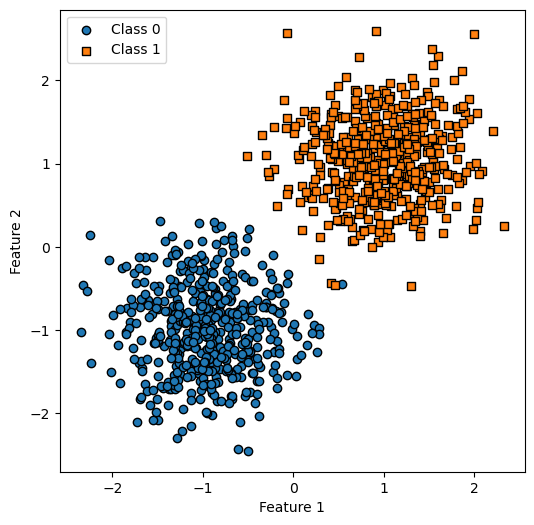

Initialized Neural Network with 465 parameters:

   {layer}: {# parameters}
     Dense: 48
 LeakyReLU: 0
     Dense: 272
 LeakyReLU: 0
     Dense: 136
 LeakyReLU: 0
     Dense: 9
   Sigmoid: 0


In [98]:
### START CODE HERE ###
# generate dataset
data_X, data_Y = extras.generate_dataset(1024, "centroids")

# split dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test = extras.split_dataset(data_X, data_Y)

# initialize model
NN = NeuralNet([
    Dense(2, 16, 'he'),
    LeakyReLU(),

    Dense(16, 16, 'he'),
    LeakyReLU(),

    Dense(16, 8, 'he'),
    LeakyReLU(),

    Dense(8, 1, 'he'),
    Sigmoid(),
])

### END CODE HERE ###

The next cell will compile the model (basically setting the optimizer and the loss function), train it for 100 epochs and plot the history and the decision boundary.

Model compiled successfully.


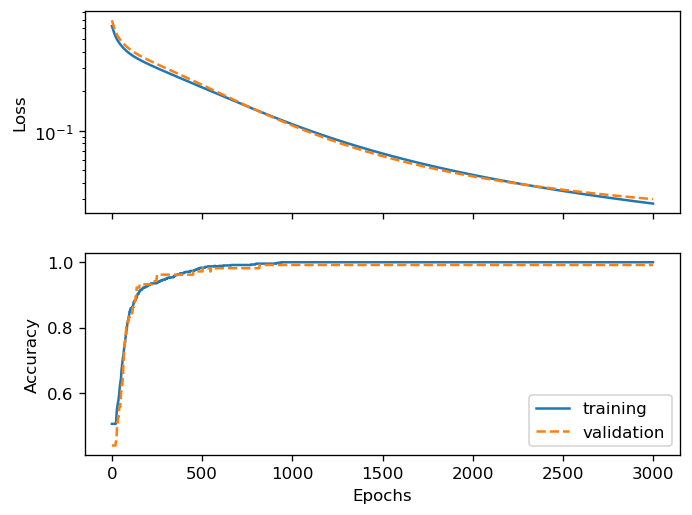

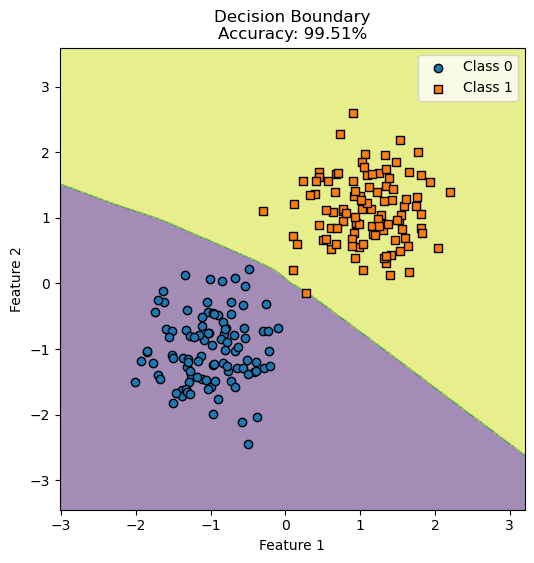

In [99]:
NN.compile(
	loss_function=BinaryCrossEntropy,
	optimizer=GradientDescent(learning_rate=1),
	metric=BinaryAccuracy
)

NN_history = NN.fit(
	X_train.T,
	Y_train,
	X_val.T,
	Y_val,
	3000,
	verbose=False
)

extras.plot_history(NN_history)
extras.plot_decision_boundary(NN, X_test, Y_test)

## Task 1.4.3 - Initialization Matters

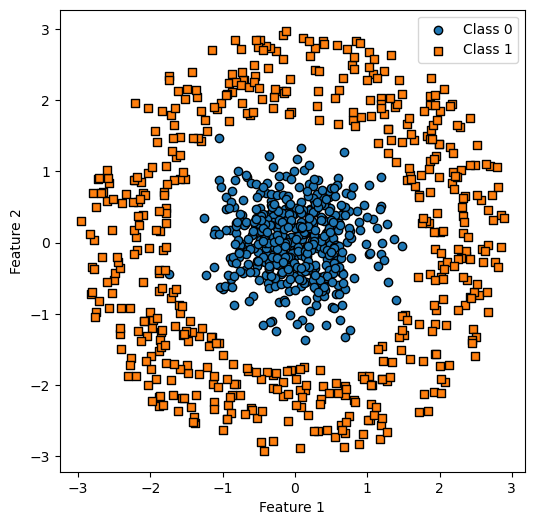

Initialized Neural Network with 1425 parameters:

   {layer}: {# parameters}
     Dense: 96
 LeakyReLU: 0
     Dense: 1056
 LeakyReLU: 0
     Dense: 264
 LeakyReLU: 0
     Dense: 9
   Sigmoid: 0


In [110]:
### START CODE HERE ###
# generate dataset
data_X, data_Y = extras.generate_dataset(1024, "ring")

# split dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test = extras.split_dataset(data_X, data_Y)

# initialize model
NN = NeuralNet([
    Dense(2, 32, 'he'),
    LeakyReLU(),

    Dense(32, 32, 'he'),
    LeakyReLU(),

    Dense(32, 8, 'he'),
    LeakyReLU(),

    Dense(8, 1, 'he'),
    Sigmoid(),
])

### END CODE HERE ###

Model compiled successfully.


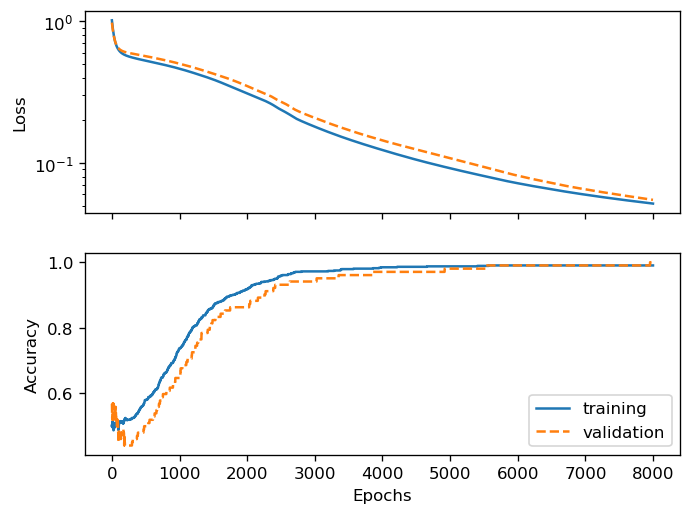

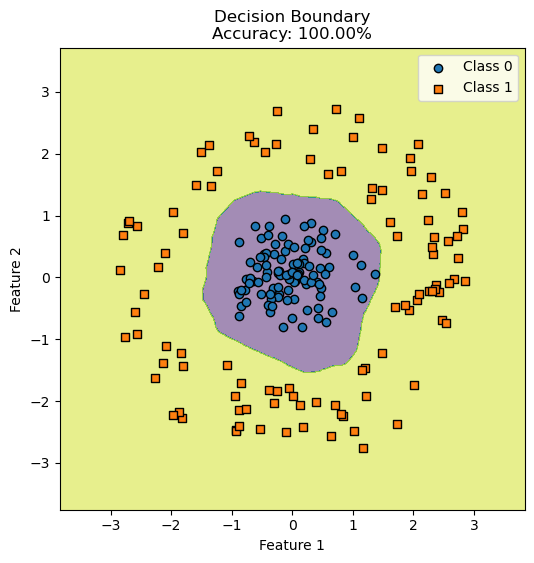

In [112]:
NN.compile(
	loss_function=BinaryCrossEntropy,
	optimizer=GradientDescent(learning_rate=1),
	metric=BinaryAccuracy
)

NN_history = NN.fit(
	X_train.T,
	Y_train,
	X_val.T,
	Y_val,
	5000,
	verbose=False
)

extras.plot_history(NN_history)
extras.plot_decision_boundary(NN, X_test, Y_test)

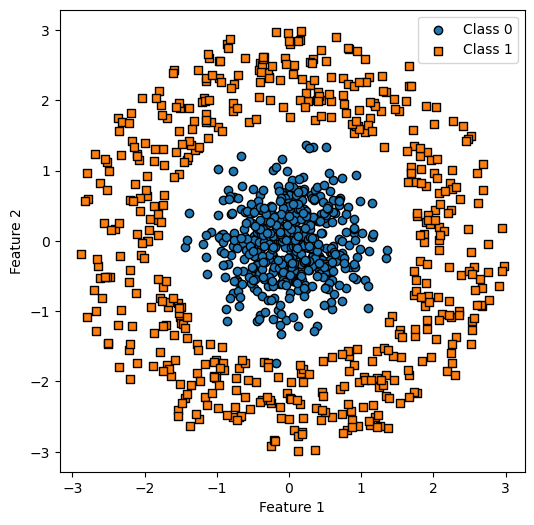

Initialized Neural Network with 1425 parameters:

   {layer}: {# parameters}
     Dense: 96
 LeakyReLU: 0
     Dense: 1056
 LeakyReLU: 0
     Dense: 264
 LeakyReLU: 0
     Dense: 9
   Sigmoid: 0


In [119]:
### START CODE HERE ###
# generate dataset
data_X, data_Y = extras.generate_dataset(1024, "ring")

# split dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test = extras.split_dataset(data_X, data_Y)

# initialize model
NN = NeuralNet([
    Dense(2, 32, 'xavier'),
    LeakyReLU(),

    Dense(32, 32, 'xavier'),
    LeakyReLU(),

    Dense(32, 8, 'xavier'),
    LeakyReLU(),

    Dense(8, 1, 'xavier'),
    Sigmoid(),
])

### END CODE HERE ###

Model compiled successfully.


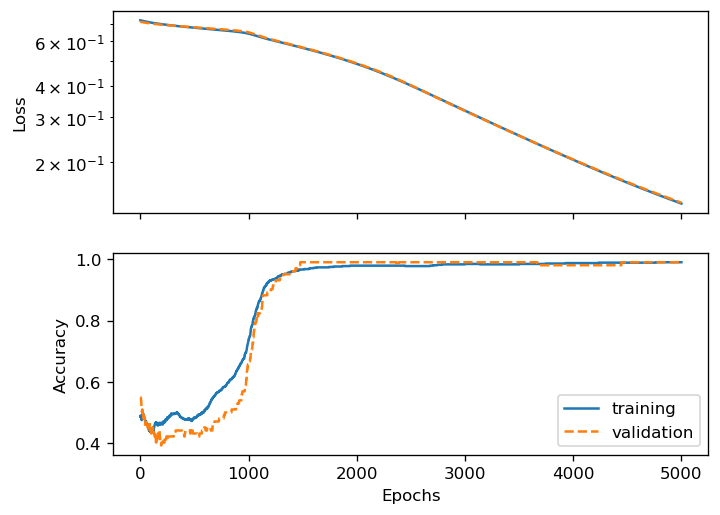

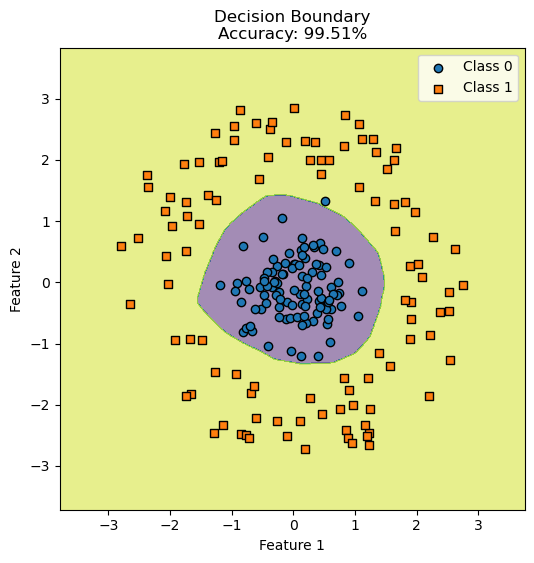

In [120]:
NN.compile(
	loss_function=BinaryCrossEntropy,
	optimizer=GradientDescent(learning_rate=1),
	metric=BinaryAccuracy
)

NN_history = NN.fit(
	X_train.T,
	Y_train,
	X_val.T,
	Y_val,
	5000,
	verbose=False
)

extras.plot_history(NN_history)
extras.plot_decision_boundary(NN, X_test, Y_test)

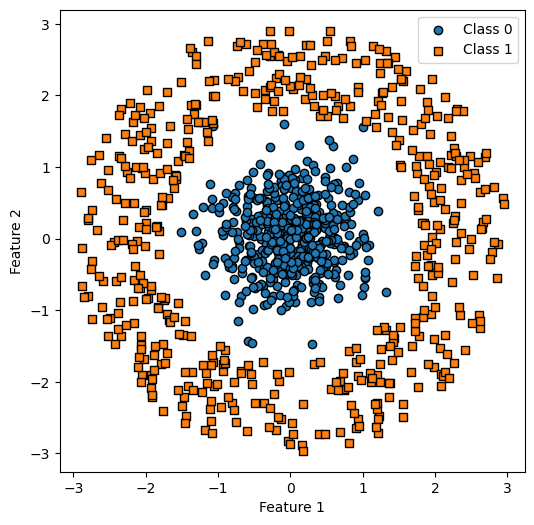

Initialized Neural Network with 1425 parameters:

   {layer}: {# parameters}
     Dense: 96
 LeakyReLU: 0
     Dense: 1056
 LeakyReLU: 0
     Dense: 264
 LeakyReLU: 0
     Dense: 9
   Sigmoid: 0


In [122]:
### START CODE HERE ###
# generate dataset
data_X, data_Y = extras.generate_dataset(1024, "ring")

# split dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test = extras.split_dataset(data_X, data_Y)

# initialize model
NN = NeuralNet([
    Dense(2, 32, 'constant'),
    LeakyReLU(),

    Dense(32, 32, 'constant'),
    LeakyReLU(),

    Dense(32, 8, 'constant'),
    LeakyReLU(),

    Dense(8, 1, 'constant'),
    Sigmoid(),
])

### END CODE HERE ###

Model compiled successfully.


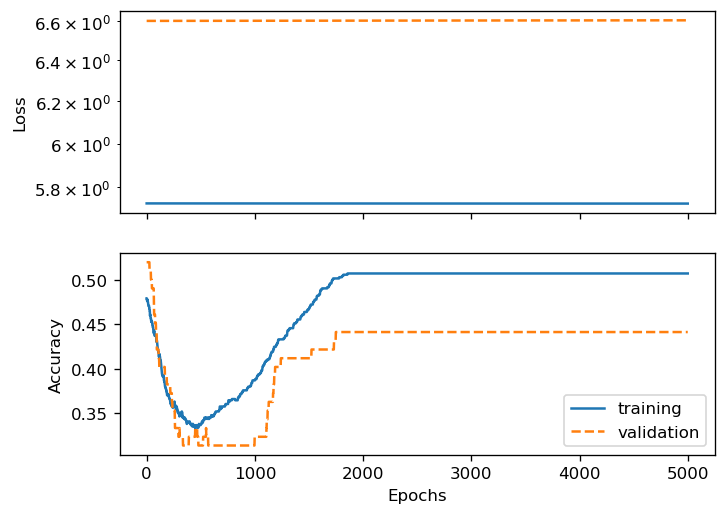

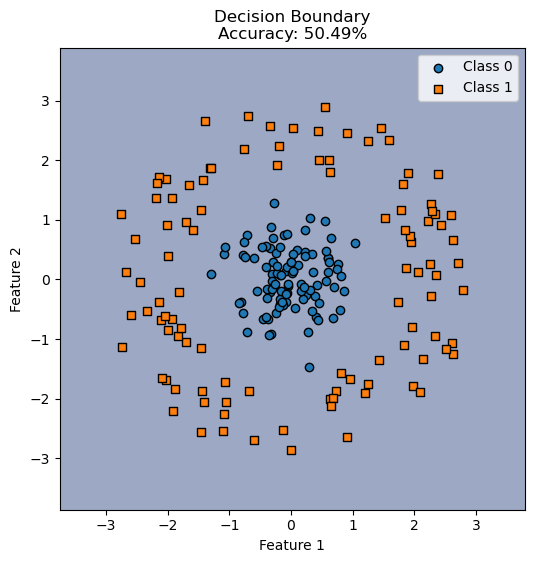

In [123]:
NN.compile(
	loss_function=BinaryCrossEntropy,
	optimizer=GradientDescent(learning_rate=1),
	metric=BinaryAccuracy
)

NN_history = NN.fit(
	X_train.T,
	Y_train,
	X_val.T,
	Y_val,
	5000,
	verbose=False
)

extras.plot_history(NN_history)
extras.plot_decision_boundary(NN, X_test, Y_test)

Constant Initialization sucks! Xavier and He are working fine.

## Task 1.4.4 - We have to go deeper!

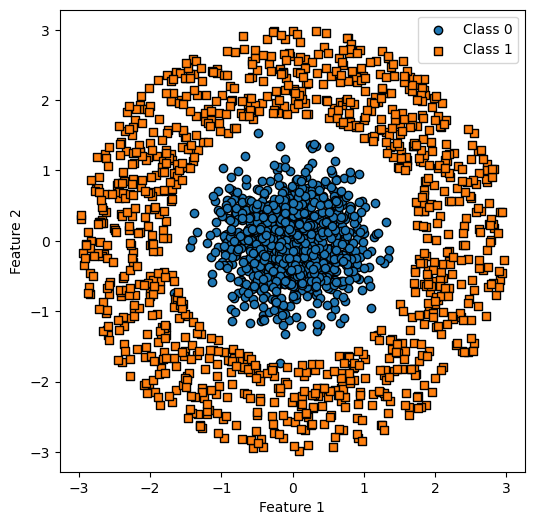

Initialized Neural Network with 1425 parameters:

   {layer}: {# parameters}
     Dense: 96
 LeakyReLU: 0
     Dense: 1056
 LeakyReLU: 0
     Dense: 264
 LeakyReLU: 0
     Dense: 9
   Sigmoid: 0


In [124]:
### START CODE HERE ###
# generate dataset
data_X, data_Y = extras.generate_dataset(2048, "ring")

# split dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test = extras.split_dataset(data_X, data_Y)

# initialize model
NN = NeuralNet([
    Dense(2, 32, 'xavier'),
    LeakyReLU(),

    Dense(32, 32, 'xavier'),
    LeakyReLU(),

    Dense(32, 8, 'xavier'),
    LeakyReLU(),

    Dense(8, 1, 'xavier'),
    Sigmoid(),
])

### END CODE HERE ###

Model compiled successfully.


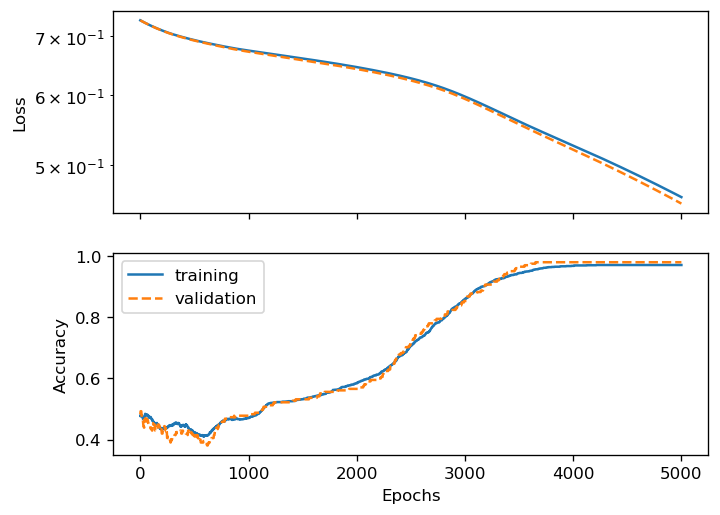

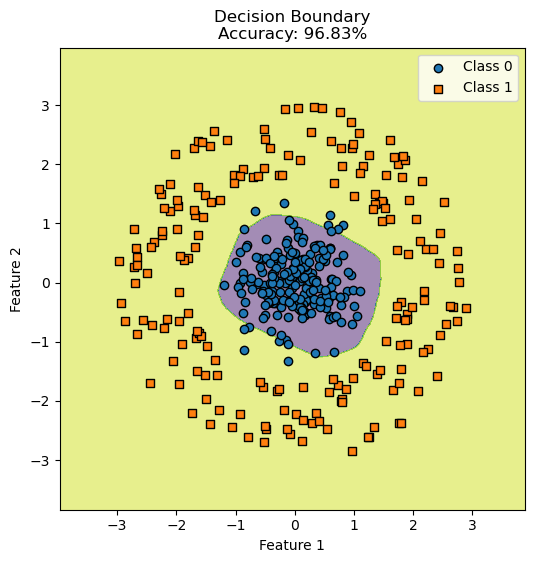

In [125]:
NN.compile(
	loss_function=BinaryCrossEntropy,
	optimizer=GradientDescent(learning_rate=1),
	metric=BinaryAccuracy
)

NN_history = NN.fit(
	X_train.T,
	Y_train,
	X_val.T,
	Y_val,
	5000,
	verbose=False
)

extras.plot_history(NN_history)
extras.plot_decision_boundary(NN, X_test, Y_test)

## Task 1.4.5 - The Spiral

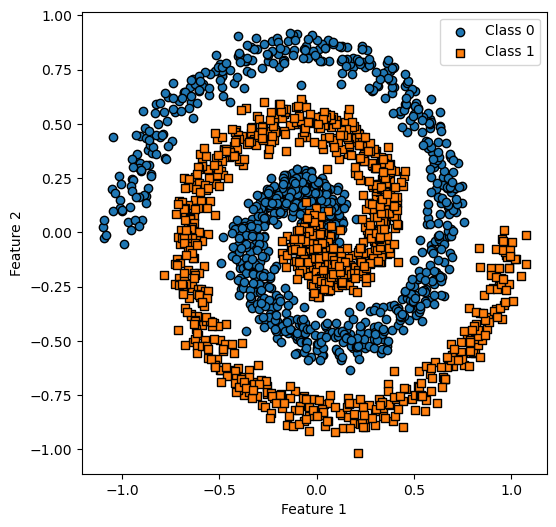

Initialized Neural Network with 11681 parameters:

   {layer}: {# parameters}
     Dense: 192
 LeakyReLU: 0
     Dense: 4160
 LeakyReLU: 0
     Dense: 4160
 LeakyReLU: 0
     Dense: 2080
 LeakyReLU: 0
     Dense: 1056
 LeakyReLU: 0
     Dense: 33
   Sigmoid: 0


In [134]:
### START CODE HERE ###
# generate dataset
data_X, data_Y = extras.generate_dataset(2048, "spiral")

# split dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test = extras.split_dataset(data_X, data_Y)

# initialize model
NN = NeuralNet([
    Dense(2, 64, 'he'),
    LeakyReLU(),

    Dense(64, 64, 'he'),
    LeakyReLU(),

    Dense(64, 64, 'he'),
    LeakyReLU(),

    Dense(64, 32, 'he'),
    LeakyReLU(),

    Dense(32, 32, 'he'),
    LeakyReLU(),

    Dense(32, 1, 'he'),
    Sigmoid(),
])
### END CODE HERE ###

Model compiled successfully.


C:\Users\mwaqa\AppData\Local\Temp\ipykernel_21584\324787129.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


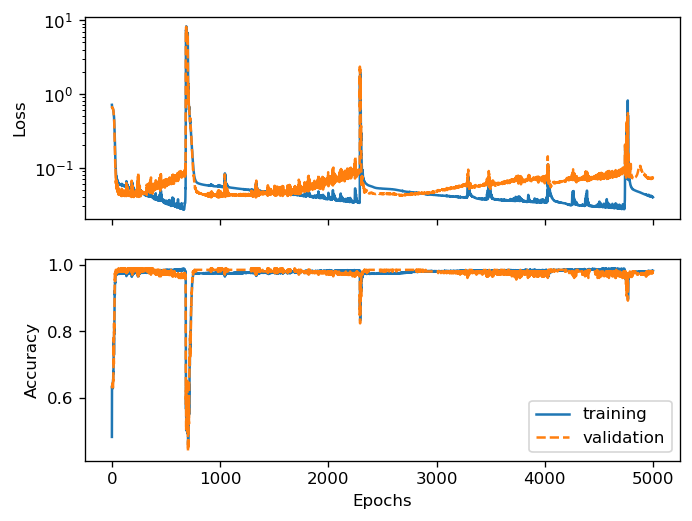

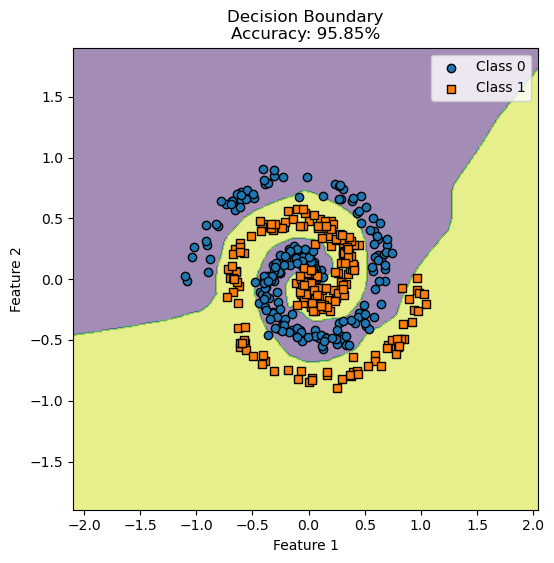

In [135]:
### START CODE HERE ###

NN.compile(
	loss_function=BinaryCrossEntropy,
	optimizer=Adam(learning_rate=0.01),
	metric=BinaryAccuracy
)

NN_history = NN.fit(
	X_train.T,
	Y_train,
	X_val.T,
	Y_val,
	5000,
	verbose=False
)

extras.plot_history(NN_history)
extras.plot_decision_boundary(NN, X_test, Y_test)

### END CODE HERE ###

I had to use Adam optimizer, Gradient Descent is too unstable for this.